<a href="https://colab.research.google.com/github/hyfoo-bot/project/blob/main/data%20analyticsTrees_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The first step is to import our favourite csv file containing HDB resale flat data. On the left, click on the Folders icon (green circle) and Upload (blue circle) the file from your computer. Remember you are operating on the cloud (provided free from Google) so you need to upload your local data to work on it. After uploading, the file will appear in the list.

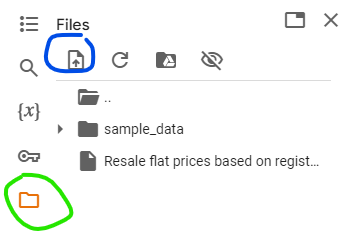

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Next, we import the csv data into Python. Here, we use `pandas`, a package of tools designed for data manipulation and analysis. You can think of these packages as 'toolboxes' that you used in Matlab that have specific capabilities. In Python, you need to manually import the packages that you need.

To run the code snippet below, you can click on the code then press Shift-Enter, or simply press the 'Play' button that appears on the left when you mouseover the code.

In [ ]:
import pandas as pd # import the package

data = pd.read_csv('/Resale flat prices based on registration date from Jan-2017 onwards.csv') # read the csv. the file needs to be uploaded first
data = data.drop(columns=['month','block','street_name','remaining_lease']) # simplify dataset
data.head(3) # display the first 3 rows for visualization

,town,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,ANG MO KIO,2 ROOM,10 TO 12,44.0,Improved,1979,232000.0
1,ANG MO KIO,3 ROOM,01 TO 03,67.0,New Generation,1978,250000.0
2,ANG MO KIO,3 ROOM,01 TO 03,67.0,New Generation,1980,262000.0


Let's try using the other columns that we haven't explored yet. 'Town' is a good one, as we know that location can greatly influence resale price. But there are so many towns and they are not numerical, so it seems hard to get started. Same issue with flat_type and the other columns. But `pandas` has a tool exactly for this.

In [ ]:
data = pd.get_dummies(data)
data.head(3)

,floor_area_sqm,lease_commence_date,resale_price,town_ANG MO KIO,town_BEDOK,town_BISHAN,town_BUKIT BATOK,town_BUKIT MERAH,town_BUKIT PANJANG,town_BUKIT TIMAH,...,flat_model_Multi Generation,flat_model_New Generation,flat_model_Premium Apartment,flat_model_Premium Apartment Loft,flat_model_Premium Maisonette,flat_model_Simplified,flat_model_Standard,flat_model_Terrace,flat_model_Type S1,flat_model_Type S2
0,44.0,1979,232000.0,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,67.0,1978,250000.0,True,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
2,67.0,1980,262000.0,True,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False


Notice what `get_dummies` is doing - it has converted the 'categorical' features (features with more than one output) into binary features automatically! This format can now be used for training.

Now we make arrays for the features and the label we are predicting, the resale price. For this we use the package `numpy`, which you should have already explored in the earlier tutorial.

In [ ]:
import numpy as np

# we convert to numpy arrays for data splitting and model training
y = np.array(data['resale_price']) # this extracts the resale_price column
x = np.array(data.drop(columns='resale_price')) # remove resale_price from the feature set
feature_names = list(data.columns) # names of the features
print(x,y,feature_names) # display a few rows of all arrays for reference

[[44.0 1979 True ... False False False]
 [67.0 1978 True ... False False False]
 [67.0 1980 True ... False False False]
 ...
 [123.0 1988 False ... False False False]
 [122.0 1987 False ... False False False]
 [164.0 1992 False ... False False False]] [ 232000.  250000.  262000. ...  728000.  690000. 1000000.] ['floor_area_sqm', 'lease_commence_date', 'resale_price', 'town_ANG MO KIO', 'town_BEDOK', 'town_BISHAN', 'town_BUKIT BATOK', 'town_BUKIT MERAH', 'town_BUKIT PANJANG', 'town_BUKIT TIMAH', 'town_CENTRAL AREA', 'town_CHOA CHU KANG', 'town_CLEMENTI', 'town_GEYLANG', 'town_HOUGANG', 'town_JURONG EAST', 'town_JURONG WEST', 'town_KALLANG/WHAMPOA', 'town_MARINE PARADE', 'town_PASIR RIS', 'town_PUNGGOL', 'town_QUEENSTOWN', 'town_SEMBAWANG', 'town_SENGKANG', 'town_SERANGOON', 'town_TAMPINES', 'town_TOA PAYOH', 'town_WOODLANDS', 'town_YISHUN', 'flat_type_1 ROOM', 'flat_type_2 ROOM', 'flat_type_3 ROOM', 'flat_type_4 ROOM', 'flat_type_5 ROOM', 'flat_type_EXECUTIVE', 'flat_type_MULTI-GENERATI

We need to split the data into training, validation, and test sets. Here we begin to use the `scikit-learn` package, a powerful set of machine learning tools including virtually any algorithm or model you can think of. The built-in splitting function only does 2 sets. We will split twice to get 3 sets.

In [ ]:
from sklearn.model_selection import train_test_split # we import only one function rather than the entire package, to save on memory

train_ratio = 0.60
validation_ratio = 0.20
test_ratio = 0.20

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=1 - train_ratio)
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio))


And we're ready to start training! Let's start with random forest. We just need 2 lines of code!!

In [ ]:
from sklearn.ensemble import RandomForestRegressor # we are doing regression

rf = RandomForestRegressor(n_estimators = 30) # start by creating an instance of the model, with 30 trees
rf.fit(x_train,y_train) # then we train

RandomForestRegressor(n_estimators=30)

Now let's see how we performed on the validation set. We will use mean squared error to estimate the regression error.

---



In [ ]:
y_train_predict = rf.predict(x_train)
y_val_predict = rf.predict(x_val)

# YOUR CODE HERE
rf_train_errors = np.square(y_train_predict - y_train)
rf_val_errors = np.square(y_val_predict - y_val)
# YOUR CODE ENDS

print('Mean squared train error:', '{:.2e}'.format(round(np.mean(rf_train_errors),2))) # display the error value in scientific format
print('Mean squared val error:', '{:.2e}'.format(round(np.mean(rf_val_errors),2)))

Mean squared train error: 3.55e+09
Mean squared val error: 5.52e+09


We know that the number of trees can be optimized. This is a hyperparameter. Also there is a choice of how to do the feature subsets (sqrt or log2), also a hyperparameter. But it's virtually impossible to test this manually. Here we will use the out-of-bag (OOB) error to find the optimal number of trees and feature subsetting. The code is modified from the scikit-learn documentation [here](https://scikit-learn.org/0.18/auto_examples/ensemble/plot_ensemble_oob.html) to work with regression.

In [ ]:
from collections import OrderedDict
from sklearn.metrics import mean_squared_error

ensemble_clfs = [
    ("RandomForestRegressor, max_features='sqrt'",
        RandomForestRegressor(max_features="sqrt",
                              oob_score=mean_squared_error)),
    ("RandomForestRegressor, max_features='log2'",
        RandomForestRegressor(max_features='log2',
                               oob_score=mean_squared_error))
    ]

error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

# Range of `n_estimators` values to explore. Set max higher if needed.
min_estimators = 30
max_estimators = 121

for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators, 10): # plot at intervals of 10 trees to save time
        clf.set_params(n_estimators=i)
        clf.fit(x_train, y_train)

        # Record the OOB error for each `n_estimators=i` setting.
        oob_error = clf.oob_score_
        error_rate[label].append((i, oob_error))
        print('Model of', '{:}'.format(i), ' trees with ', label, ' training complete')


Model of 30  trees with  RandomForestRegressor, max_features='sqrt'  training complete
Model of 40  trees with  RandomForestRegressor, max_features='sqrt'  training complete
Model of 50  trees with  RandomForestRegressor, max_features='sqrt'  training complete
Model of 60  trees with  RandomForestRegressor, max_features='sqrt'  training complete
Model of 70  trees with  RandomForestRegressor, max_features='sqrt'  training complete
Model of 80  trees with  RandomForestRegressor, max_features='sqrt'  training complete
Model of 90  trees with  RandomForestRegressor, max_features='sqrt'  training complete
Model of 100  trees with  RandomForestRegressor, max_features='sqrt'  training complete
Model of 110  trees with  RandomForestRegressor, max_features='sqrt'  training complete
Model of 120  trees with  RandomForestRegressor, max_features='sqrt'  training complete
Model of 30  trees with  RandomForestRegressor, max_features='log2'  training complete
Model of 40  trees with  RandomForestReg

Plot the OOB error:

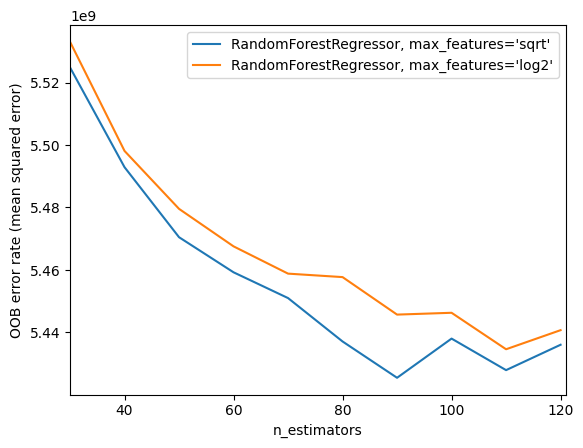

In [ ]:
import matplotlib.pyplot as plt

# Generate the "OOB error rate" vs. "n_estimators" plot.
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate (mean squared error)")
plt.legend(loc="upper right")
plt.show()

You probably noticed that it takes really long to calculate OOB error. So it's still nice to have a validation set for hyperparameter tuning. To save time we only plotted a few data points. For a real project, you should allow the code to run longer so you can see the OOB error flatten out at larger tree numbers.

How does your random forest model compare to linear regression? Train a linear regression model, then compare the validation error to your random forest model. Try to write this code yourself. You can simply google "sklearn linear regression" to find many resources. Such is the power of working in the Python community!

In [ ]:
# YOUR CODE HERE - COMPLETE THE FOLLOWING LINES
from sklearn.linear_model import LinearRegression # insert the correct model name

# create instance of model, and start training
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

# Predict on training and validation set and obtain errors
y_train_linreg_predict = lin_reg.predict(x_train)
y_val_linreg_predict = lin_reg.predict(x_val)
linreg_train_errors = np.square(y_train_linreg_predict - y_train)
linreg_val_errors = np.square(y_val_linreg_predict - y_val)
# YOUR CODE ENDS

print('Mean squared train error:', '{:.2e}'.format(round(np.mean(linreg_train_errors),2))) # display the error value in scientific format
print('Mean squared val error:', '{:.2e}'.format(round(np.mean(linreg_val_errors),2)))


Mean squared train error: 7.29e+09
Mean squared val error: 7.32e+09
